In [1]:
import os 
import os.path as op
import seaborn as sns
%matplotlib inline

In [2]:
base_dir = op.join(os.environ['HOME'], 'git', 'dyscalculia_modelling')

In [3]:
import scipy.stats as ss
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



data_oldformat = pd.read_spss(op.join(base_dir, 'Data_Pacman.sav'))

df = pd.read_csv(op.join(base_dir, 'NMB_merged.txt'), sep=",") #, header=None

ix_small = df['Condition.paramod'] == 1.0
ix_medium = df['Condition.paramod'] == 2.0
ix_large = df['Condition.paramod'] == 3.0
ix_control = df['Condition.paramod'] == 0.0

df = df.loc[~ix_control,] # remove control condition

df.loc[ix_small,'ratio'] = 0.91 #hardest --> 0 on Images.ACC = false response
df.loc[ix_medium,'ratio'] = 0.83
df.loc[ix_large,'ratio'] = 0.7


df['log_ratio'] = -np.log(df['ratio'])


#sns.lmplot('log_ratio', 'Images.ACC', data=df, logistic=True)

# filter out excluded subjects
Subs_exclude = np.array(data_oldformat.loc[data_oldformat['Einschluss'] == 'nein', 'VP'])
sub_ex = []
for sub in Subs_exclude:
    ix_ex = df['Subject'] == int(sub)
    df = df.loc[~ix_ex,] 
    sub_ex.append(int(sub))
    
sub_IDs = df['Subject'].unique()
N_subs = np.shape(data_oldformat['VP'])[0]

group = []
for sub in sub_IDs:
    for s in range(0,N_subs):
        num = int(data_oldformat.loc[s]['VP'])       
        if sub == num:
            group.append(data_oldformat.loc[s]['Group'])

for s in range(0,len(sub_IDs)):
    ix = df['Subject'] == sub_IDs[s]
    df.loc[ix, 'group'] = group[s]             
            
df = df.set_index('Subject')

df.index.name = 'subject'

/Users/gdehol/miniconda3/envs/pymc3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


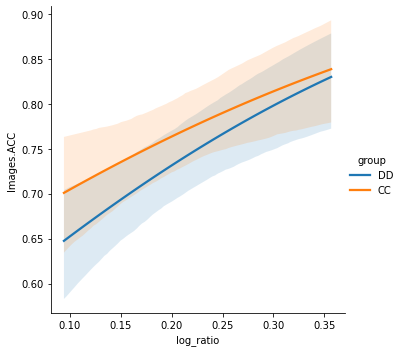

In [4]:
sns.lmplot('log_ratio', 'Images.ACC', hue='group', data=df.reset_index(), scatter=False, logistic=True)

In [5]:
df['accuracy'] = df['Images.ACC']

In [6]:
df_old = data_oldformat
df_old['VP'] = df_old['VP'].astype(int)

/Users/gdehol/miniconda3/envs/pymc3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


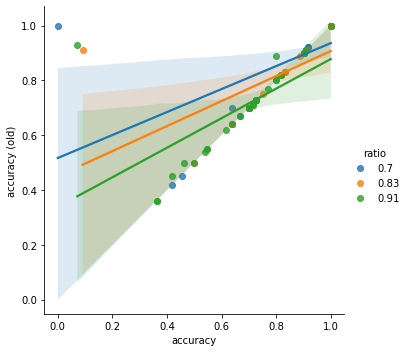

In [7]:

tmp = df_old.set_index('VP')[['P_NMB_ACC_L', 'P_NMB_ACC_M', 'P_NMB_ACC_S']]
tmp.columns = [0.7, 0.83, .91]
tmp.index.name, tmp.columns.name = 'subject', 'ratio'
tmp = tmp.stack().to_frame('accuracy (old)')

tmp2 = df.groupby(['subject', 'ratio']).mean()

tmp = tmp.join(tmp2)
tmp = tmp[~tmp.isnull().any(1)]

sns.lmplot('accuracy', 'accuracy (old)', data=tmp.reset_index(), hue='ratio')

In [8]:
import pingouin

In [9]:
tmp.groupby('subject').apply(lambda d: pingouin.corr(d['accuracy'], d['accuracy (old)'])).sort_values('r')

/Users/gdehol/miniconda3/envs/pymc3/lib/python3.8/site-packages/pingouin/effsize.py:139: RuntimeWarning: divide by zero encountered in double_scalars
  se = 1 / np.sqrt(nx - 3)
/Users/gdehol/miniconda3/envs/pymc3/lib/python3.8/site-packages/pingouin/power.py:896: UserWarning: Sample size is too small to estimate power (n <= 4). Returning NaN.
  warnings.warn("Sample size is too small to estimate power "
/Users/gdehol/miniconda3/envs/pymc3/lib/python3.8/site-packages/pingouin/effsize.py:139: RuntimeWarning: divide by zero encountered in double_scalars
  se = 1 / np.sqrt(nx - 3)
/Users/gdehol/miniconda3/envs/pymc3/lib/python3.8/site-packages/pingouin/power.py:896: UserWarning: Sample size is too small to estimate power (n <= 4). Returning NaN.
  warnings.warn("Sample size is too small to estimate power "
/Users/gdehol/miniconda3/envs/pymc3/lib/python3.8/site-packages/pingouin/effsize.py:139: RuntimeWarning: divide by zero encountered in double_scalars
  se = 1 / np.sqrt(nx - 3)
/Users/gd

,,n,r,CI95%,p-val,BF10,power
subject,,,,,,,
316,pearson,3,-0.999966,"[-1.0, 1.0]",5.275754e-03,1.974,NaN
336,pearson,3,0.801091,"[-1.0, 1.0]",4.085065e-01,0.953,NaN
23,pearson,3,0.891042,"[-1.0, 1.0]",2.999501e-01,1.108,NaN
38,pearson,3,0.975417,"[-1.0, 1.0]",1.414503e-01,1.462,NaN
1,pearson,3,0.996616,"[-1.0, 1.0]",5.238893e-02,1.766,NaN
39,pearson,3,0.999792,"[-1.0, 1.0]",1.297065e-02,1.938,NaN
37,pearson,3,0.999957,"[-1.0, 1.0]",5.880674e-03,1.971,NaN
15,pearson,3,0.999963,"[-1.0, 1.0]",5.485724e-03,1.973,NaN
30,pearson,3,0.999971,"[-1.0, 1.0]",4.886128e-03,1.976,NaN


/Users/gdehol/miniconda3/envs/pymc3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gdehol/miniconda3/envs/pymc3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gdehol/miniconda3/envs/pymc3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

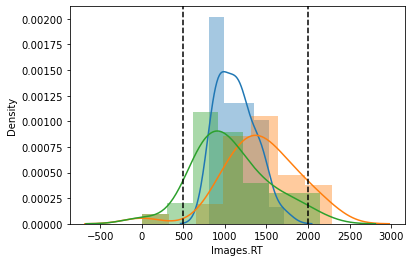

In [10]:
sns.distplot(df.loc[16, 'Images.RT'])
sns.distplot(df.loc[336, 'Images.RT'])
sns.distplot(df.loc[23, 'Images.RT'])

plt.axvline(500, c='k', ls='--')
plt.axvline(2000, c='k', ls='--')

In [11]:
df.loc[316, 'Images.ACC'] = -(df.loc[316, 'Images.ACC']-1)
df['accuracy'] = df['Images.ACC']

/Users/gdehol/miniconda3/envs/pymc3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


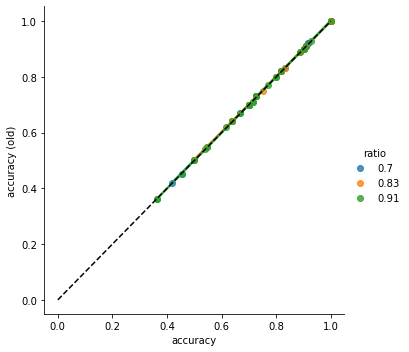

In [12]:

tmp = df_old.set_index('VP')[['P_NMB_ACC_L', 'P_NMB_ACC_M', 'P_NMB_ACC_S']]
tmp.columns = [0.7, 0.83, .91]
tmp.index.name, tmp.columns.name = 'subject', 'ratio'
tmp = tmp.stack().to_frame('accuracy (old)')

tmp2 = df[(df['Images.RT'] >0)].groupby(['subject', 'ratio']).mean()
tmp = tmp.join(tmp2)
tmp = tmp[~tmp.isnull().any(1)]

sns.lmplot('accuracy', 'accuracy (old)', data=tmp.reset_index(), hue='ratio')

plt.plot([0, 1], [0, 1], c='k', ls='--')

In [13]:
df = df[df['Images.RT'] > 0.0]

/Users/gdehol/miniconda3/envs/pymc3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


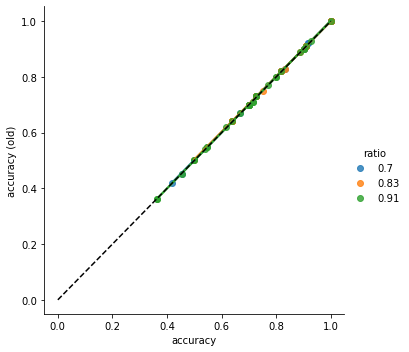

In [14]:

tmp = df_old.set_index('VP')[['P_NMB_ACC_L', 'P_NMB_ACC_M', 'P_NMB_ACC_S']]
tmp.columns = [0.7, 0.83, .91]
tmp.index.name, tmp.columns.name = 'subject', 'ratio'
tmp = tmp.stack().to_frame('accuracy (old)')

tmp2 = df.groupby(['subject', 'ratio']).mean()
tmp = tmp.join(tmp2)
tmp = tmp[~tmp.isnull().any(1)]

sns.lmplot('accuracy', 'accuracy (old)', data=tmp.reset_index(), hue='ratio')

plt.plot([0, 1], [0, 1], c='k', ls='--')

/Users/gdehol/miniconda3/envs/pymc3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


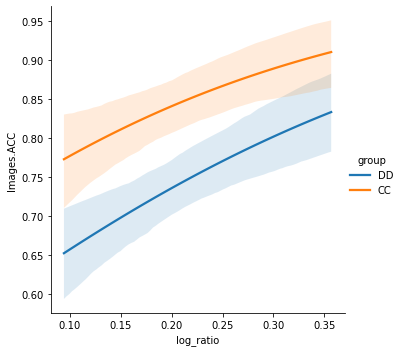

In [24]:
sns.lmplot('log_ratio', 'Images.ACC', hue='group', data=df.reset_index(), scatter=False, logistic=True)

In [16]:
import bambi as bmb

In [31]:
model = bmb.Model('accuracy ~ 0 + log_ratio + log_ratio:group', data=df.reset_index(), link='probit', family='bernoulli')

results = model.fit(2000, 2000, target_accept=0.975, init='adapt_diag')

Modeling the probability that accuracy==1
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [log_ratio, log_ratio:group]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 34 seconds.


In [32]:
import arviz as az

array([[<AxesSubplot:title={'center':'log_ratio'}>,
        <AxesSubplot:title={'center':'log_ratio'}>],
       [<AxesSubplot:title={'center':'log_ratio:group'}>,
        <AxesSubplot:title={'center':'log_ratio:group'}>]], dtype=object)

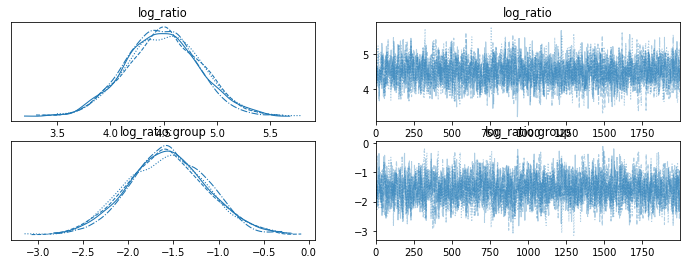

In [33]:
az.plot_trace(results)

In [37]:
results.posterior['log_ratio:group'].to_dataframe()

log_ratio:group
chain draw log_ratio:group_dim                 
0     0    DD                         -0.962456
      1    DD                         -1.484468
      2    DD                         -1.596108
      3    DD                         -1.875853
      4    DD                         -1.254293
...                                         ...
3     1995 DD                         -2.023115
      1996 DD                         -1.878807
      1997 DD                         -1.893559
      1998 DD                         -1.370077
      1999 DD                         -0.953867

[8000 rows x 1 columns]

/Users/gdehol/miniconda3/envs/pymc3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

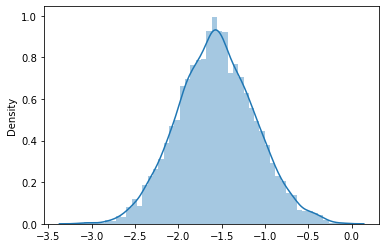

In [38]:
sns.distplot(results.posterior['log_ratio:group'].to_dataframe())


In [39]:
model = bmb.Model('accuracy ~ 0 + log_ratio + log_ratio:group + (0+log_ratio:group|subject)', data=df.reset_index(), link='probit', family='bernoulli')

results = model.fit(2000, 2000, target_accept=0.975, init='adapt_diag')

Modeling the probability that accuracy==1
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [log_ratio, log_ratio:group, log_ratio:group|subject_sigma, log_ratio:group|subject_offset]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 150 seconds.


array([[<AxesSubplot:title={'center':'log_ratio'}>,
        <AxesSubplot:title={'center':'log_ratio'}>],
       [<AxesSubplot:title={'center':'log_ratio:group'}>,
        <AxesSubplot:title={'center':'log_ratio:group'}>],
       [<AxesSubplot:title={'center':'log_ratio:group|subject_sigma'}>,
        <AxesSubplot:title={'center':'log_ratio:group|subject_sigma'}>],
       [<AxesSubplot:title={'center':'log_ratio:group|subject'}>,
        <AxesSubplot:title={'center':'log_ratio:group|subject'}>]],
      dtype=object)

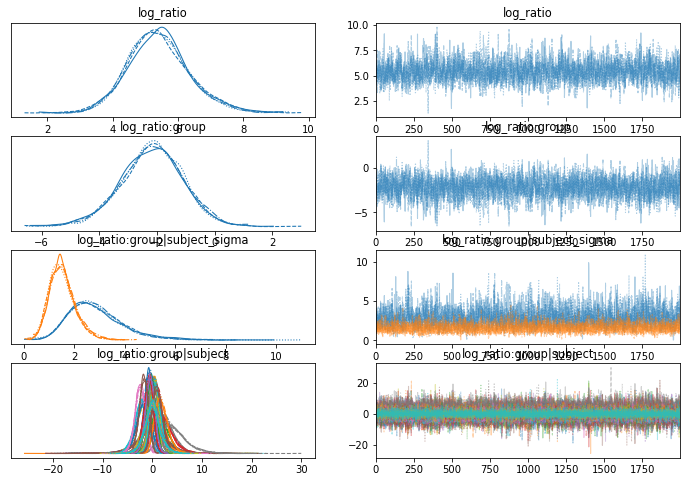

In [40]:
az.plot_trace(results)

/Users/gdehol/miniconda3/envs/pymc3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

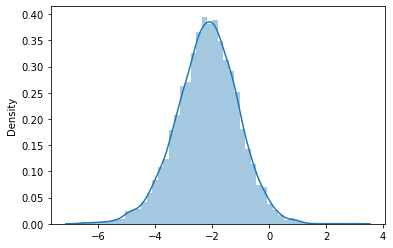

In [41]:
sns.distplot(results.posterior['log_ratio:group'].to_dataframe())


In [42]:
(results.posterior['log_ratio:group'].to_dataframe() < 0.0).mean()

log_ratio:group    0.9815
dtype: float64